In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Credit Card Default Prediction_Datasheet/credit_card_data.csv')
dataset = dataset.sample(n=200,replace =False,random_state=1)

In [19]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12573,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29676,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8856,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21098,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0
17458,17459,140000,2,3,1,30,0,0,0,0,...,82227,65000,60848,4700,4505,12906,0,2210,2300,0
1476,1477,200000,1,2,2,26,-1,-1,0,0,...,16017,12613,6600,12957,3884,5010,700,360,1713,0
5120,5121,150000,1,2,2,37,-1,0,0,0,...,64942,61803,58987,2500,2500,3780,2200,2000,2000,0
18338,18339,20000,2,2,2,22,0,0,0,0,...,19706,19818,20006,3000,3001,3000,2000,1002,783,0
28279,28280,230000,2,2,2,36,-2,-1,-1,-1,...,656,827,2360,885,669,656,827,2376,943,0


In [20]:
dataset.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16003,16004,230000,2,2,1,37,0,0,0,0,...,124743,127507,121400,4500,4600,4389,4697,4800,4000,0
2697,2698,30000,2,3,2,26,0,0,0,0,...,26840,28271,28134,1700,1407,1200,2000,2000,1000,0
9300,9301,130000,2,1,2,28,-2,-2,-2,-2,...,0,1170,0,8611,0,0,1170,0,1070,1
6610,6611,130000,2,3,2,27,0,0,0,0,...,21200,21810,13629,2000,5000,5000,1000,4000,6587,0
25858,25859,140000,2,2,1,37,-1,-1,-1,-1,...,1516,326,1439,326,326,1516,326,1439,326,1
10834,10835,270000,1,2,1,52,0,-1,-1,-1,...,9078,5058,6177,4937,2000,9078,0,6177,4600,0
26462,26463,300000,2,2,1,50,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29124,29125,20000,2,3,2,56,0,0,0,2,...,14426,14526,15026,1214,3100,0,500,500,0,0
7380,7381,320000,2,2,1,29,0,0,0,0,...,106095,92573,89650,30236,5004,4086,5033,5020,3006,0
9407,9408,160000,1,2,2,28,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 10747 to 9407
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          200 non-null    int64
 1   LIMIT_BAL                   200 non-null    int64
 2   SEX                         200 non-null    int64
 3   EDUCATION                   200 non-null    int64
 4   MARRIAGE                    200 non-null    int64
 5   AGE                         200 non-null    int64
 6   PAY_0                       200 non-null    int64
 7   PAY_2                       200 non-null    int64
 8   PAY_3                       200 non-null    int64
 9   PAY_4                       200 non-null    int64
 10  PAY_5                       200 non-null    int64
 11  PAY_6                       200 non-null    int64
 12  BILL_AMT1                   200 non-null    int64
 13  BILL_AMT2                   200 non-null    int64
 14  BILL_

In [23]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,14165.435000,178500.000000,1.585000,1.920000,1.56000,34.710000,-0.160000,-0.325000,-0.355000,-0.340000,...,45681.680000,41049.495000,40377.065000,5647.825000,6586.495000,6031.38000,5875.795000,7996.485000,5675.640000,0.205000
std,8736.568979,123197.557569,0.493958,0.947676,0.50763,8.903497,1.081782,1.097908,1.069906,1.034287,...,61916.508907,55249.351769,55639.033771,10594.631658,15658.855924,15126.42492,14678.030841,18813.672842,22138.984779,0.404715
min,70.000000,10000.000000,1.000000,1.000000,1.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1796.000000,-1197.000000,-77.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7003.750000,70000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2253.250000,1447.750000,1763.750000,853.750000,1036.000000,895.25000,392.250000,501.500000,0.000000,0.000000
50%,12829.000000,155000.000000,2.000000,2.000000,2.00000,32.000000,0.000000,0.000000,0.000000,0.000000,...,19729.500000,19115.500000,16517.500000,2238.000000,2872.500000,2000.00000,2000.000000,2000.000000,1509.000000,0.000000
75%,21920.750000,260000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,...,63643.000000,57768.500000,51339.000000,5841.000000,5736.750000,5552.75000,5240.000000,6034.500000,4000.000000,0.000000
max,29944.000000,550000.000000,2.000000,6.000000,3.00000,64.000000,4.000000,3.000000,3.000000,3.000000,...,313242.000000,249697.000000,258353.000000,80004.000000,145000.000000,182781.00000,140597.000000,148120.000000,221000.000000,1.000000


There are 200 distinct credit card clients.

The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.

Education Level is mostly graduate school and university.

Most of the clients are either married or single .

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [26]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [25]:
dataset.index = dataset['ID']

In [27]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29677,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0
17459,17459,140000,2,3,1,30,0,0,0,0,...,82227,65000,60848,4700,4505,12906,0,2210,2300,0
1477,1477,200000,1,2,2,26,-1,-1,0,0,...,16017,12613,6600,12957,3884,5010,700,360,1713,0
5121,5121,150000,1,2,2,37,-1,0,0,0,...,64942,61803,58987,2500,2500,3780,2200,2000,2000,0
18339,18339,20000,2,2,2,22,0,0,0,0,...,19706,19818,20006,3000,3001,3000,2000,1002,783,0


In [28]:
dataset.drop('ID',axis=1,inplace=True)

In [29]:
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [30]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [31]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [32]:
dataset['SEX'].value_counts(dropna=False)

2    117
1     83
Name: SEX, dtype: int64

In [33]:
dataset['EDUCATION'].value_counts(dropna=False)

2    86
1    73
3    33
5     6
4     1
6     1
Name: EDUCATION, dtype: int64

In [35]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [36]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

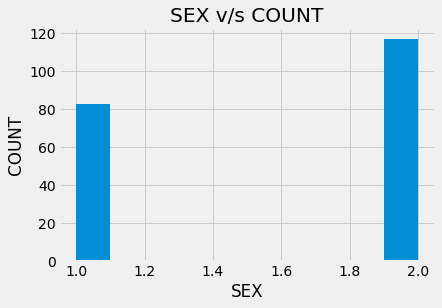

In [39]:
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Number of Male credit holder is less than Female

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

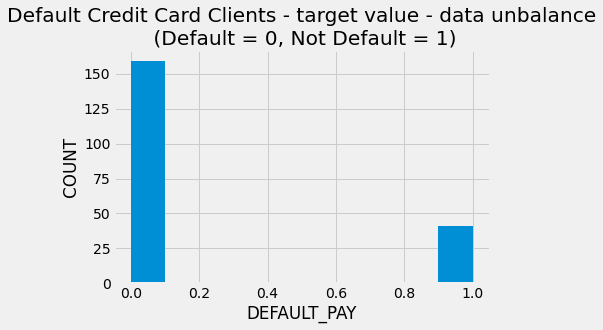

In [40]:
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

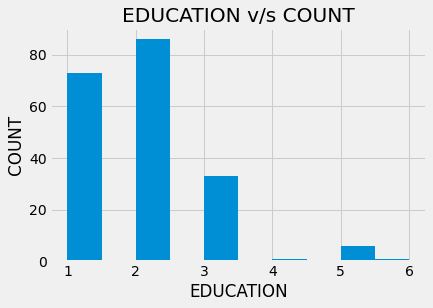

In [41]:
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

Credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

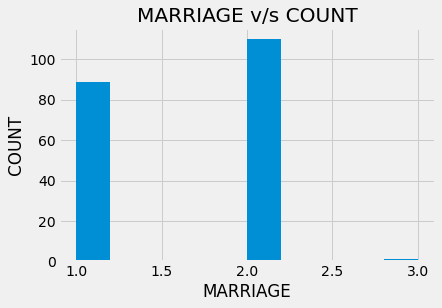

In [42]:
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

 credit cards holder are Married

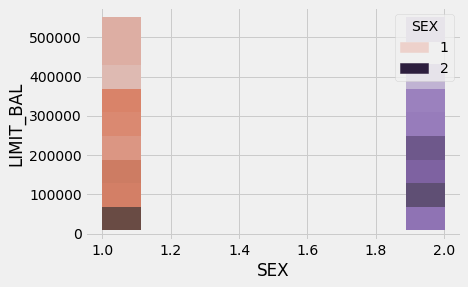

In [52]:
sns.histplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

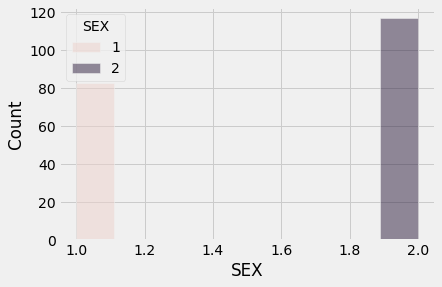

In [51]:
sns.histplot(x='SEX',data=dataset,hue = 'SEX')

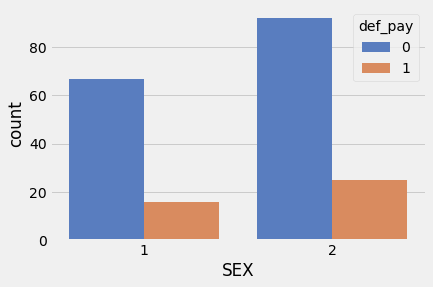

In [53]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted") 

the above output that females have overall less default payments wrt males

Non-Defaults have a higher proportion of Females (Sex=2)

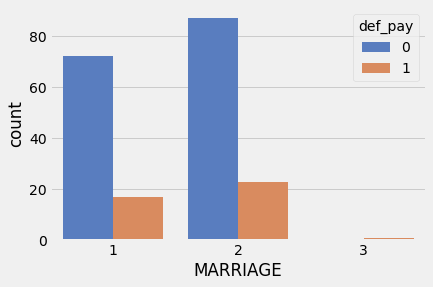

In [54]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")

the above plot it is clear that those people who have marital status single have less default payment wrt married status people

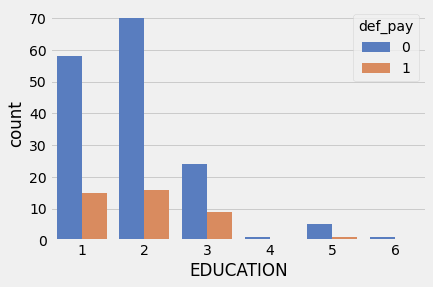

In [55]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

In [56]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

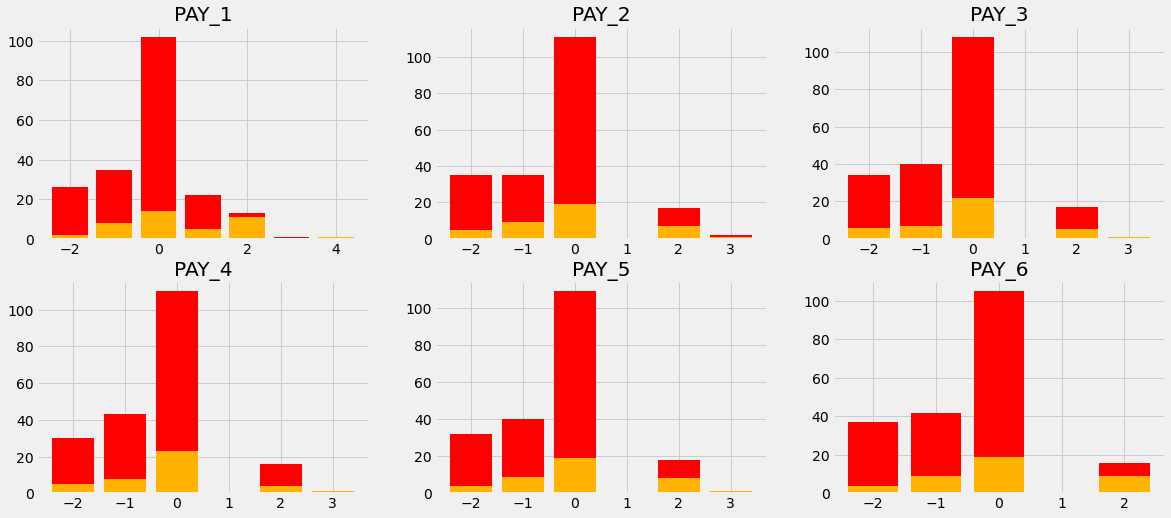

In [57]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
      
plt.show()

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

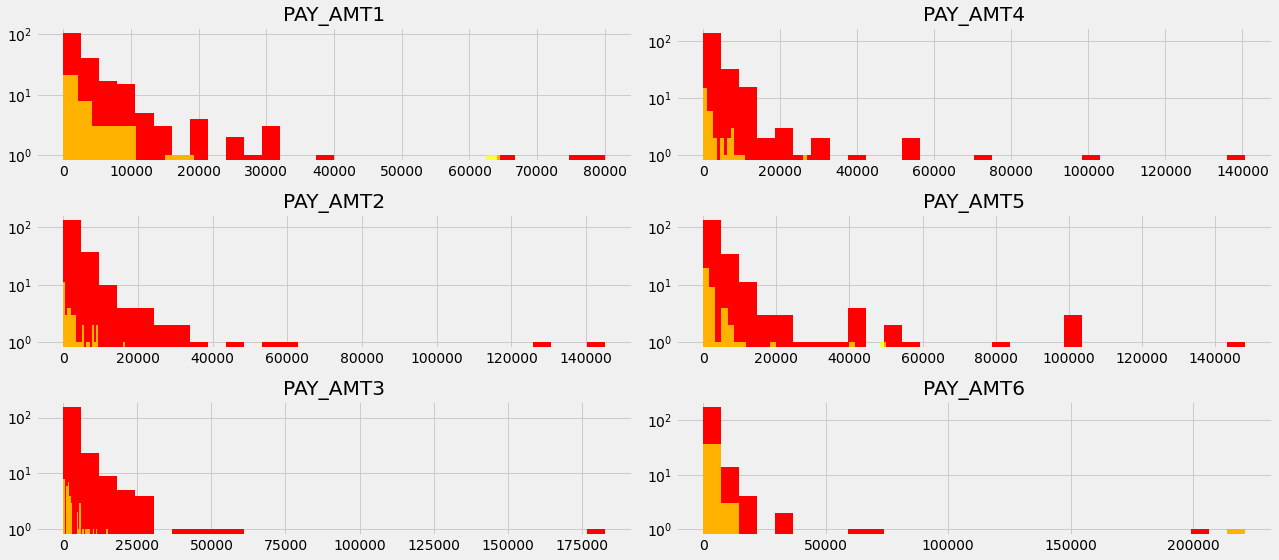

In [58]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

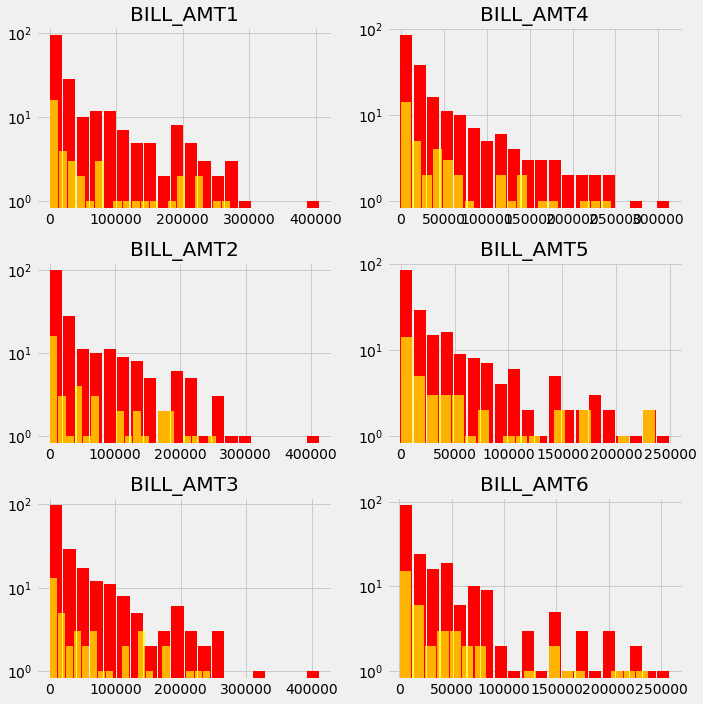

In [59]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

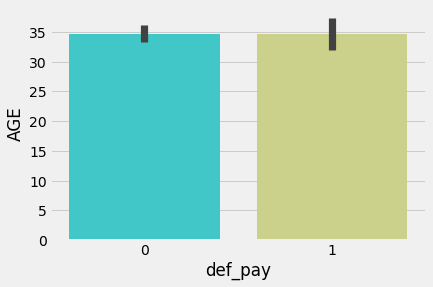

In [60]:
sns.barplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')

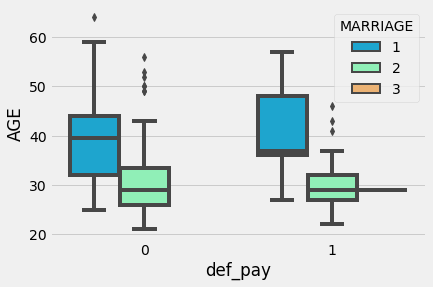

In [61]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")

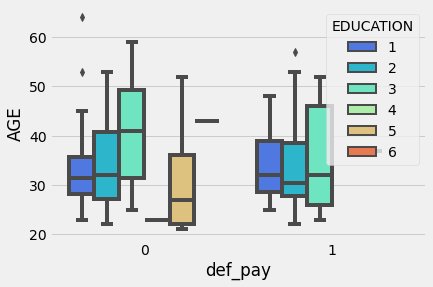

In [62]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )

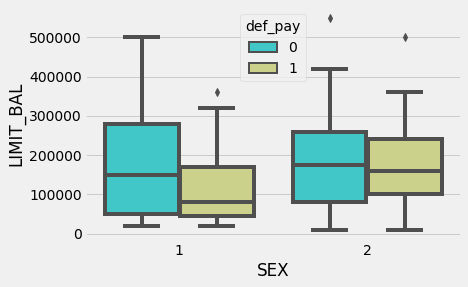

In [63]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

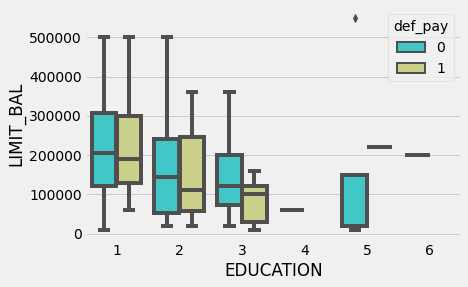

In [64]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

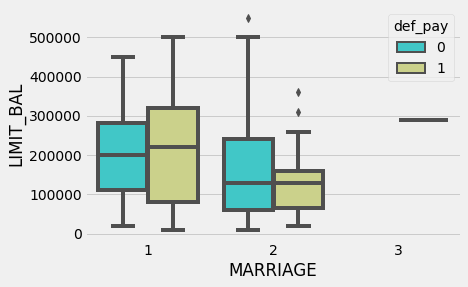

In [65]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

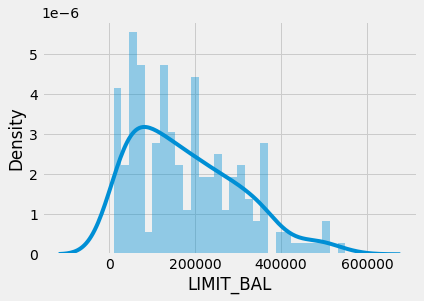

In [66]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

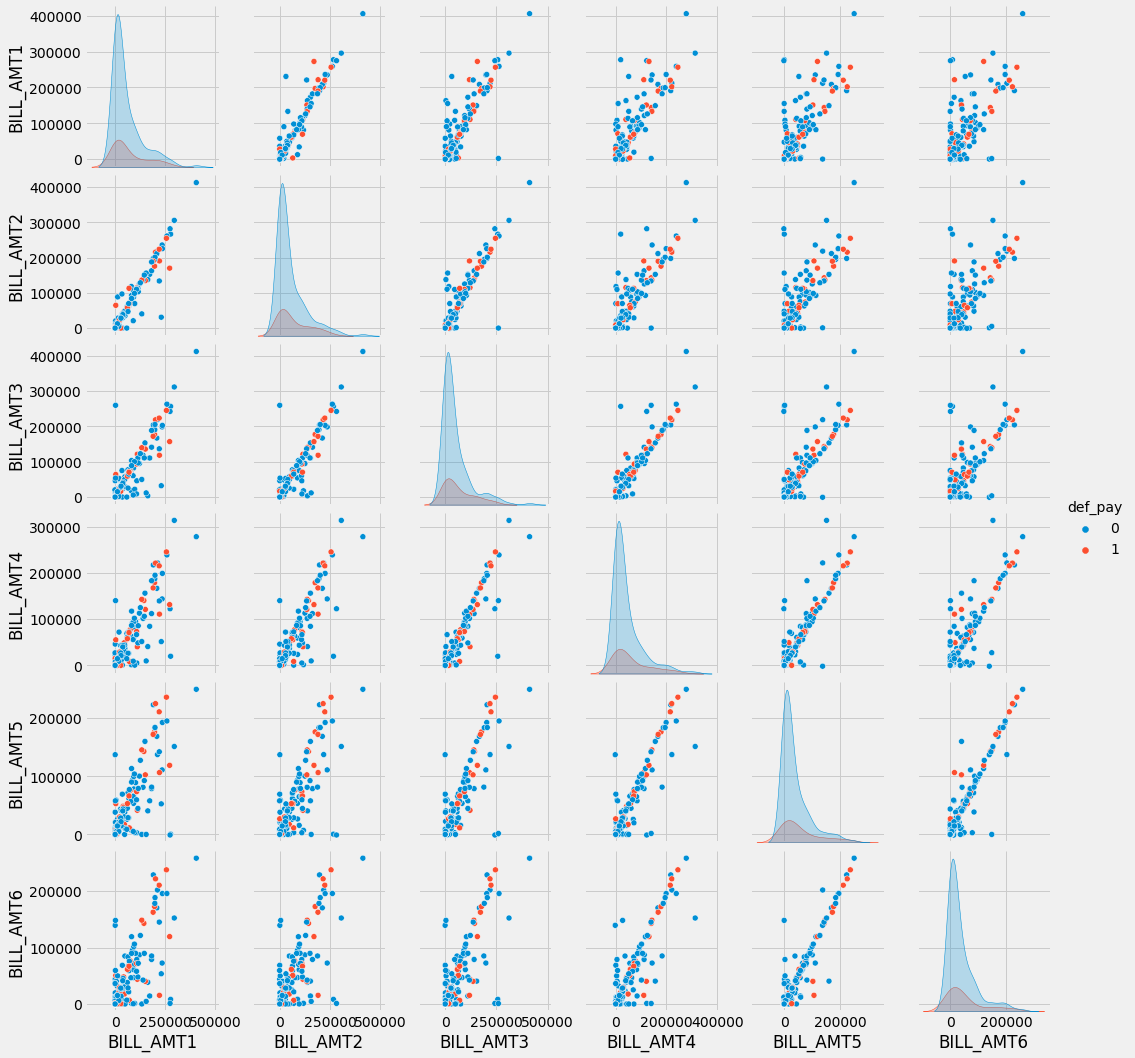

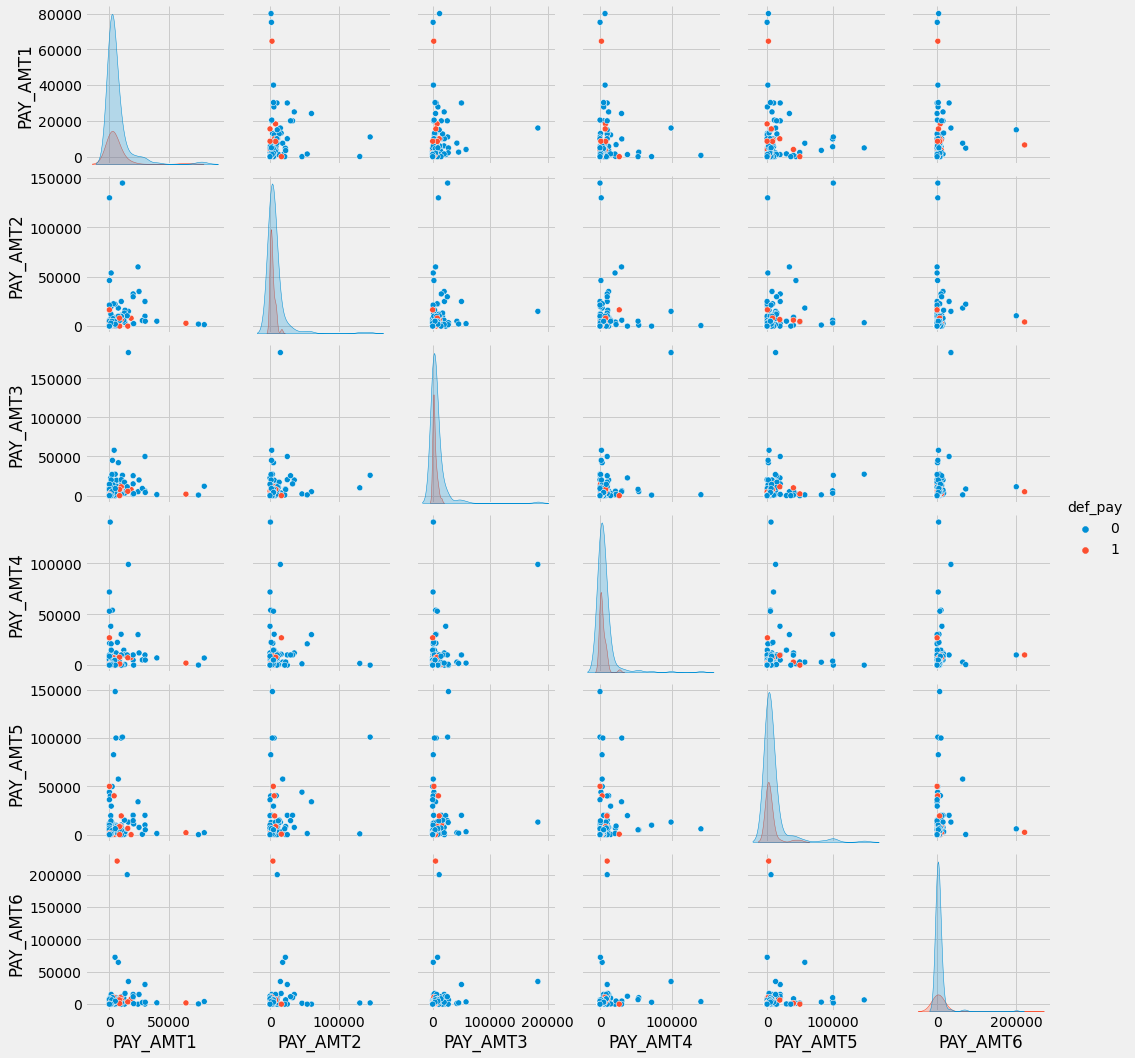

In [67]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

Observing Correlation between features of the Dataset

In [68]:
correlation = dataset.corr()

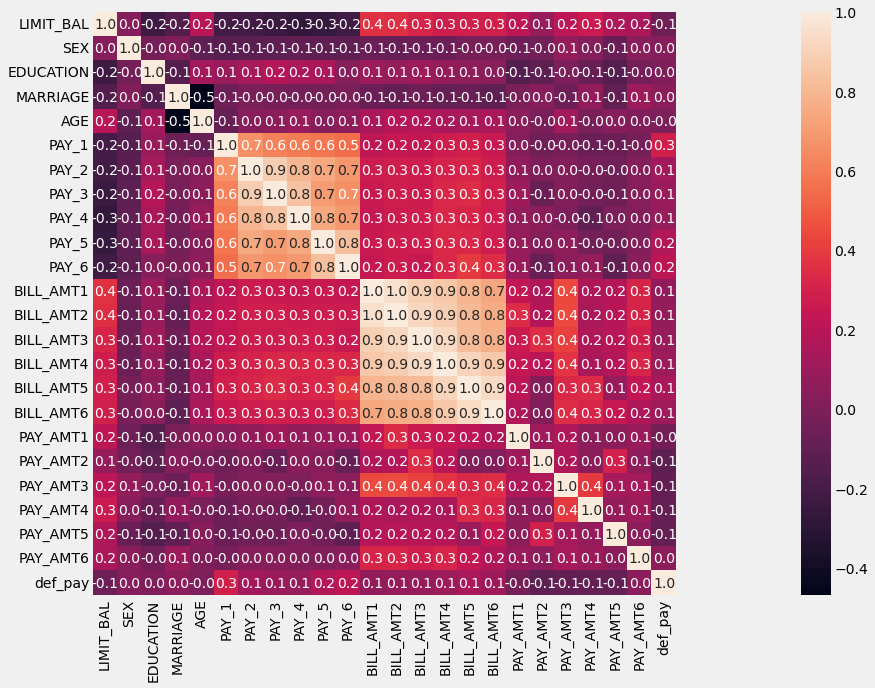

In [70]:
plt.subplots(figsize=(40,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 


it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

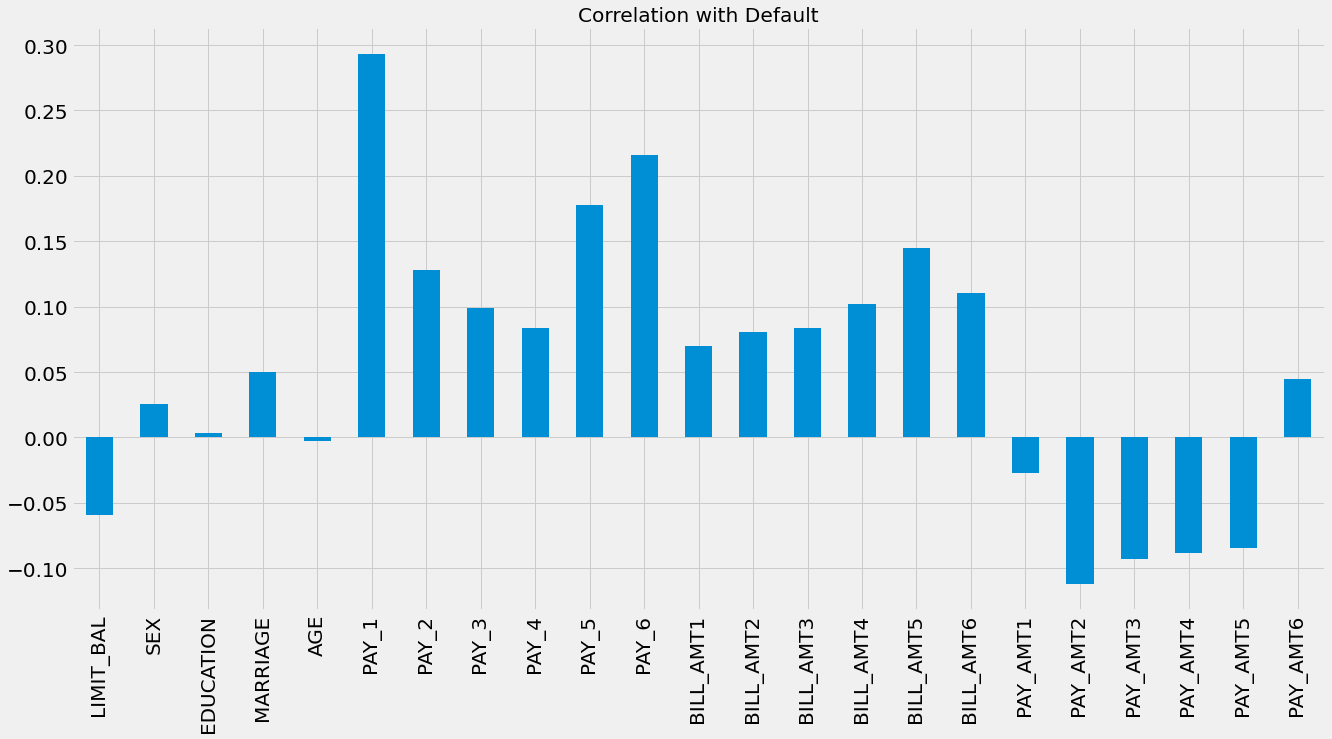

In [71]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

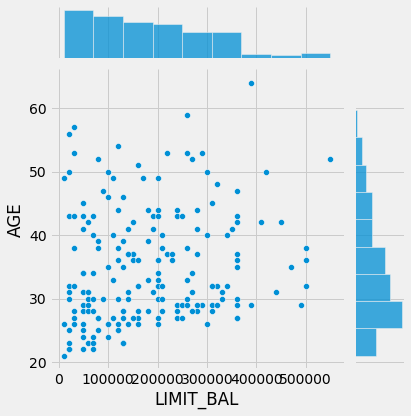

In [72]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")

Data Cleaning

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [75]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    86
1    73
3    33
4     8
Name: EDUCATION, dtype: int64

In [76]:
dataset['EDUCATION'].value_counts(dropna = False)

2    86
1    73
3    33
4     8
Name: EDUCATION, dtype: int64

In [77]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    110
1     89
3      1
Name: MARRIAGE, dtype: int64

In [78]:
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [79]:
dataset.tail(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10835,270000,1,2,1,52,0,-1,-1,-1,2,...,9078,5058,6177,4937,2000,9078,0,6177,4600,0
26463,300000,2,2,1,50,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29125,20000,2,3,2,56,0,0,0,2,0,...,14426,14526,15026,1214,3100,0,500,500,0,0
7381,320000,2,2,1,29,0,0,0,0,0,...,106095,92573,89650,30236,5004,4086,5033,5020,3006,0
9408,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [80]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    184
2     16
Name: PAY_6, dtype: int64

In [81]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [82]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10835,270000,1,2,1,52,0,0,0,0,2,...,9078,5058,6177,4937,2000,9078,0,6177,4600,0
26463,300000,2,2,1,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29125,20000,2,3,2,56,0,0,0,2,0,...,14426,14526,15026,1214,3100,0,500,500,0,0
7381,320000,2,2,1,29,0,0,0,0,0,...,106095,92573,89650,30236,5004,4086,5033,5020,3006,0
9408,160000,1,2,2,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


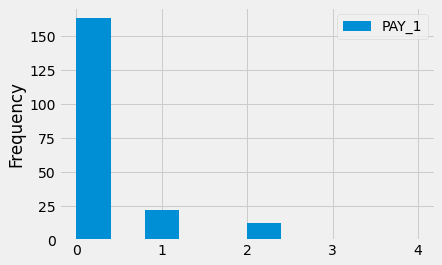

In [83]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [84]:
dataset['PAY_1'].describe()

count    200.000000
mean       0.275000
std        0.649217
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: PAY_1, dtype: float64

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 10748 to 9408
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  200 non-null    int64
 1   SEX        200 non-null    int64
 2   EDUCATION  200 non-null    int64
 3   MARRIAGE   200 non-null    int64
 4   AGE        200 non-null    int64
 5   PAY_1      200 non-null    int64
 6   PAY_2      200 non-null    int64
 7   PAY_3      200 non-null    int64
 8   PAY_4      200 non-null    int64
 9   PAY_5      200 non-null    int64
 10  PAY_6      200 non-null    int64
 11  BILL_AMT1  200 non-null    int64
 12  BILL_AMT2  200 non-null    int64
 13  BILL_AMT3  200 non-null    int64
 14  BILL_AMT4  200 non-null    int64
 15  BILL_AMT5  200 non-null    int64
 16  BILL_AMT6  200 non-null    int64
 17  PAY_AMT1   200 non-null    int64
 18  PAY_AMT2   200 non-null    int64
 19  PAY_AMT3   200 non-null    int64
 20  PAY_AMT4   200 non-null    int64
 21  PAY_AMT5   

In [86]:
dataset.SEX.nunique()

2

In [87]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,5647.825000,6586.495000,6031.38000,5875.795000,7996.485000,5675.640000
std,10594.631658,15658.855924,15126.42492,14678.030841,18813.672842,22138.984779
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,853.750000,1036.000000,895.25000,392.250000,501.500000,0.000000
50%,2238.000000,2872.500000,2000.00000,2000.000000,2000.000000,1509.000000
75%,5841.000000,5736.750000,5552.75000,5240.000000,6034.500000,4000.000000
max,80004.000000,145000.000000,182781.00000,140597.000000,148120.000000,221000.000000


In [88]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,57867.215000,55051.930000,51653.345000,45681.680000,41049.495000,40377.065000
std,77163.553917,74248.478144,70926.212965,61916.508907,55249.351769,55639.033771
min,-974.000000,-974.000000,-748.000000,-1796.000000,-1197.000000,-77.000000
25%,2231.500000,1610.250000,2640.750000,2253.250000,1447.750000,1763.750000
50%,21608.000000,20641.500000,20630.000000,19729.500000,19115.500000,16517.500000
75%,87525.250000,88330.250000,70214.250000,63643.000000,57768.500000,51339.000000
max,405779.000000,412684.000000,411394.000000,313242.000000,249697.000000,258353.000000


In [89]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

One Hot encoding for categorical variable

In [92]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [93]:
dataset.shape

(200, 24)

In [94]:
dataset.columns = dataset.columns.map(str.lower)

In [95]:
dataset.head()


,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


Feature Scaling of Numerical Attributes

In [96]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [98]:
dataset.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.070070,1,3,1,-0.305139,0,0,0,0,0,...,0.626463,0.303560,-0.472328,0.250487,-0.037549,-0.134630,-0.196417,-0.372816,-0.166442,0
12574,-1.371154,2,3,1,1.609015,0,0,0,0,2,...,-0.712283,-0.724201,-0.710761,-0.534421,-0.421680,-0.212305,-0.401317,-0.416404,-0.257007,1
29677,-1.045658,1,2,1,-0.755528,0,0,0,0,0,...,0.004749,-0.721262,0.065044,-0.534421,2.539780,-0.253926,-0.312527,1.917798,-0.194246,0
8857,-0.801535,2,3,1,1.946807,2,2,3,3,3,...,-0.079883,-0.022382,0.004143,-0.184312,-0.319245,-0.293691,-0.401317,-0.340844,-0.184555,1
21099,0.744573,1,1,2,-0.079944,1,2,0,0,2,...,-0.376184,-0.463782,-0.415030,-0.534421,-0.165592,-0.267181,-0.401317,-0.319530,-0.166442,0
17459,-0.313290,2,3,1,-0.530333,0,0,0,0,2,...,0.591717,0.434586,0.368847,-0.089687,-0.133261,0.455618,-0.401317,-0.308340,-0.152858,0
1477,0.174954,1,2,2,-0.980722,0,0,0,0,0,...,-0.480310,-0.515985,-0.608598,0.691625,-0.173019,-0.067692,-0.353507,-0.406919,-0.179438,0
5121,-0.231916,1,2,2,0.257848,0,0,0,0,0,...,0.311850,0.376576,0.335316,-0.297861,-0.261625,-0.149211,-0.251057,-0.319530,-0.166442,0
18339,-1.289780,2,2,2,-1.431111,0,0,0,0,0,...,-0.420580,-0.385249,-0.367048,-0.250549,-0.229550,-0.200906,-0.264717,-0.372710,-0.221551,0


In [97]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
16004,0.419077,2,2,1,0.257848,0,0,0,0,0,...,1.280106,1.568787,1.459879,-0.108612,-0.127179,-0.108849,-0.080512,-0.170329,-0.075877,0
2698,-1.208406,2,3,2,-0.980722,0,0,0,0,0,...,-0.305071,-0.231868,-0.220597,-0.373560,-0.331601,-0.320201,-0.264717,-0.319530,-0.211725,0
9301,-0.394665,2,1,2,-0.755528,0,0,0,0,0,...,-0.739646,-0.723621,-0.727518,0.280388,-0.421680,-0.399732,-0.321406,-0.426102,-0.208555,1
6611,-0.394665,2,3,2,-0.868125,0,0,0,0,0,...,-0.396390,-0.349104,-0.481949,-0.345173,-0.101570,-0.068355,-0.333017,-0.212958,0.041269,0
25859,-0.313290,2,2,1,0.257848,0,0,0,0,0,...,-0.715100,-0.738935,-0.701590,-0.503574,-0.400809,-0.299258,-0.379051,-0.349424,-0.242245,1
10835,0.744573,1,2,1,1.946807,0,0,0,0,2,...,-0.592662,-0.653072,-0.616220,-0.067261,-0.293636,0.201916,-0.401317,-0.096953,-0.048708,0
26463,0.988696,2,2,1,1.721612,0,0,0,0,0,...,-0.739646,-0.744850,-0.727518,-0.534421,-0.421680,-0.399732,-0.401317,-0.426102,-0.257007,0
29125,-1.289780,2,3,2,2.397196,0,0,0,2,0,...,-0.506070,-0.481274,-0.456778,-0.419548,-0.223212,-0.399732,-0.367167,-0.399459,-0.257007,0
7381,1.151444,2,2,1,-0.642930,0,0,0,0,0,...,0.978171,0.934903,0.887804,2.326638,-0.101314,-0.128931,-0.057563,-0.158606,-0.120888,0


Spiliting Dataset into training(70%) and test set(30%)

In [107]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [108]:
X_train.shape

(140, 23)

In [109]:
X_test.shape

(60, 23)

Apply machine learning algorithims

Logistic Regression

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [110]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [111]:
y_pred = logmodel.predict(X_test)

In [112]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.816667,1.0,0.083333,0.153846,0.541667


K-Nearest Neighbour

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

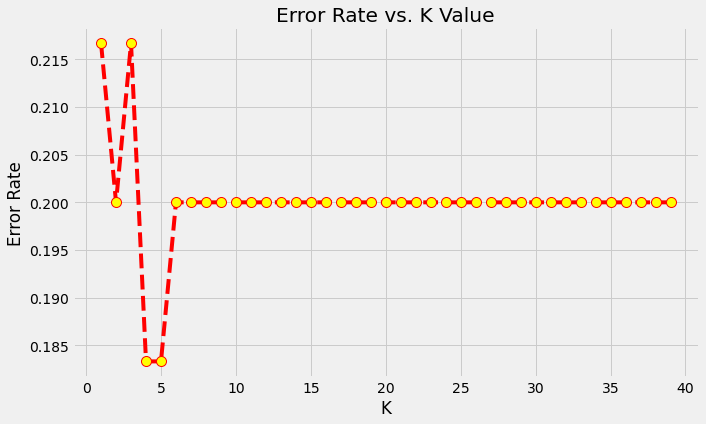

In [118]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [121]:
y_pred = knn.predict(X_test)

In [123]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.8,0.0,0.0,0.0,0.5


Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [124]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [125]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

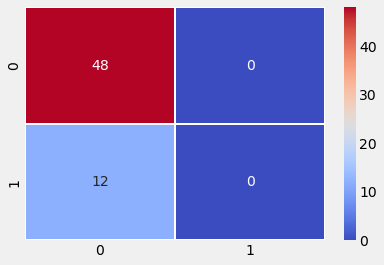

In [127]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [128]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.8,0.0,0.0,0.0,0.5


Gaussian Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [130]:
y_pred =naive_bayes.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [133]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.7,0.25,0.25,0.25,0.53125


Decision Tree Classification

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees

Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [134]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [135]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [136]:
y_pred = dct.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [138]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.583333,0.190476,0.333333,0.242424,0.489583


Random Forest Classification

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [139]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [140]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [141]:
y_pred = rfc.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [143]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.816667,1.0,0.083333,0.153846,0.541667


Conclusion


1)Using a Logistic Regression classifier, we can predict with 81.5% accuracy, whether a customer is likely to default next month

2)Using a Support Vector Machine classifier, we can predict with 80% accuracy, whether a customer is likely to default next month.

3)Using a K-Nearest Neighbour classifier, we can predict with 70.83% accuracy, whether a customer is likely to default next month.

4)Using a Decision Tree classifier, we can predict with 58.33% accuracy, whether a customer is likely to default next month.

5)Using a Random Forest classifier, we can predict with 81.6% accuracy, whether a customer is likely to default next month.

 Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.